## Notebook Summary & Key Findings

This notebook analyzes transportation choices, trip patterns, and the potential impact of a carpooling app among students and staff at SEKU. Using survey data and simulated populations, it explores:

- **Population Characteristics:**  
    - 2000 simulated users, reflecting real-world gender, age, income, and status distributions.
    - Majority are staff (approx. 70%), with students making up the rest.

- **Transportation Modes:**  
    - Main modes: Private Car, Taxi, Public Transport (Matatu), Motorcycle, Walking.
    - Mode choice is influenced by gender, residence, status, and income.

- **Trip Patterns:**  
    - Most users travel daily or several times a week.
    - Typical trip distances range from .

- **Economic & Environmental Impact:**  
    - Average emissions per user without carpooling: ~72 g/km.
    - Carpooling adoption can reduce average emissions to ~38.5 g/km.
    - App commission (18%) on taxi fares is calculated, showing potential revenue growth with increased adoption.

- **Simulation Results:**  
    - Plots show how increasing carpooling adoption rates lowers overall emissions and increases app revenue.
    - Carpooling reduces per-person emissions for car/taxi users and increases revenue for the app.

**Conclusion:**  
Adopting a carpooling app among university staff and students can significantly reduce transport-related emissions and generate substantial revenue, especially as adoption rates increase. The analysis provides a data-driven foundation for promoting sustainable mobility solutions in similar institutional settings.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Data Acquired from SEKU study 
- where student and staff means of transportation to and from school was studied 
### STUDY SUMMARY
- Random sampling was used 
- 8612 total school population at the time, 8162 student and 486 staff
- 165 responses considered after removing invalid responses
- involved 71.5% males(118), 28.5% females(47)
- population split 69.7% staff(115),30.3% students(50)


### Other Elements studied
- monthly income (<20000, 21000-40000, 41000-60000, 61000-80000, 81000-100000, >100000)
- Age(<25,26-50,51>)
- Trip purpose(work,study,both)
- infrastructure adequacy(yes,no)

In [48]:
data = {
    "Variable": [
        "Male", "Female", #gender
        "On campus", "Off campus",#location
        "Students", "Staff", #status
        "≤20k", "21k–40k", "41k–60k", "61k–80k", "81k-100k", ">100k", #income
        "<=20", "26-50", "51>", #age
        "work","study","both", #purpose
        "yes","no" #infrastructure adequacy

    ],
    "Car (%)": [44.1, 51.1, 18.2, 53.0, 20.0, 57.4, 18.5, 33.3, 25.0, 43.8,40.0,80.0,18.0,56.8,65.0,56.3,18.8,64.3,37.8,63.0],
    "Public Transport (%)": [43.2, 46.8, 42.4, 44.7, 50.0, 41.7, 53.7, 55.6, 75.0, 56.3,60.0,20.0,52.0,42.1,35.0,42.7,52.1,28.6,50.5,31.5],
    "Motorcycle (%)": [3.4, 2.1, 12.1, 0.8, 10.0, 0.0, 9.3, 0.0, 0.0, 0.0,0.0,0.0,8.0,1.1,0.0,0.0,10.4,0.0,3.6,1.9],
    "Walking (%)": [9.3, 0.0, 27.3, 1.5, 20.0, 0.9, 18.5, 11.1, 0.0, 0.0,0.0,0.0,22.0,0.0,0.0,1.0,18.8,7.1,8.1,3.7],
    "Sample size": [118, 47, 33, 132, 50, 115, 54, 9, 16,16, 10, 60, 50, 95, 20, 103, 48, 14, 111, 54]
}

df = pd.DataFrame(data)
print(df)

      Variable  Car (%)  Public Transport (%)  Motorcycle (%)  Walking (%)  \
0         Male     44.1                  43.2             3.4          9.3   
1       Female     51.1                  46.8             2.1          0.0   
2    On campus     18.2                  42.4            12.1         27.3   
3   Off campus     53.0                  44.7             0.8          1.5   
4     Students     20.0                  50.0            10.0         20.0   
5        Staff     57.4                  41.7             0.0          0.9   
6         ≤20k     18.5                  53.7             9.3         18.5   
7      21k–40k     33.3                  55.6             0.0         11.1   
8      41k–60k     25.0                  75.0             0.0          0.0   
9      61k–80k     43.8                  56.3             0.0          0.0   
10    81k-100k     40.0                  60.0             0.0          0.0   
11       >100k     80.0                  20.0             0.0   

In [49]:
Tripatt={
    "Variable": [
        "Daily","1","2","3","4","5","6", # trip frequency per week
        "<=20","21-40","41-60","61-80","80+", # distance to km
        "<100","100-500","501-1000","1001-2000","2000+"  # trip cost
    ],
    "Total number": [58,21,14,36,14,24,8,46,57,22,16,24,31,82,23,14,15],
    "Percentage (%)": [35.2, 12.7, 8.5, 15.8, 8.5, 14.5, 4.8, 27.9, 34.5, 13.3, 9.7, 14.5, 18.8, 49.7, 13.9, 8.5, 9.1]

}
tripatt_df = pd.DataFrame(Tripatt)
print(tripatt_df)

     Variable  Total number  Percentage (%)
0       Daily            58            35.2
1           1            21            12.7
2           2            14             8.5
3           3            36            15.8
4           4            14             8.5
5           5            24            14.5
6           6             8             4.8
7        <=20            46            27.9
8       21-40            57            34.5
9       41-60            22            13.3
10      61-80            16             9.7
11        80+            24            14.5
12       <100            31            18.8
13    100-500            82            49.7
14   501-1000            23            13.9
15  1001-2000            14             8.5
16      2000+            15             9.1


In the study, Extra analysis on what led people to choose their preferred mode of transportation was done. And the results were as follows

* CAR/TAXI
    - comfort(81.3%)
    - car ownership(85.7%)
    - Trip origin(66.7%)
    - Travel time(52.4%)
    - safety(50%)
* MATATU
    - trip cost(69.6%)
    - travel time(~41%)
    - safety(~45%)
* MOTORBIKE
    - trip distance(~11%)
    - trip cost(<10%)
    - travel time(<10%)
* Walking
    - trip distance(~18%)
    - trip cost(10%)
    

Using the above data one can calculate environmental impact of cars/taxi. the economic impact using taxis have and this enables me to show the theoretical impact my carshare app solution could potential have if adopted.

Target population
- Students
- staff members of big cooperations/ universities


In [50]:
import numpy as np
import pandas as pd

total_samples = 165
np.random.seed(42)

# --- BASE PROBABILITIES FROM STUDY ---
gender_p = [0.713, 0.287]   # Male, Female
residence_p = [0.20, 0.80]  # On, Off campus
status_p = [0.303, 0.697]   # Students, Staff
age_p = [0.30, 0.576, 0.124]  # <=20, 26-50, 51+
income_p = [54/165, 9/165, 16/165, 16/165, 40/165, 30/165]  
# from table approximations
reasons=["comfort","safety","trip cost","trip origin","travel time","trip distance"]

# Trip frequency distribution
trip_freq_p = [0.352, 0.127, 0.085, 0.158, 0.085, 0.145, 0.048]

# Transportation weights (from table)
def transport_dist(gender, residence, status):
    # Start with baseline (overall distribution)
    dist = np.array([0.44, 0.44, 0.05, 0.07])  # Car, PT, Moto, Walk (approx global)

    # Adjust by gender
    if gender == "Male":
        dist += np.array([0.00, -0.02, +0.01, +0.01])
    else:
        dist += np.array([+0.05, +0.03, -0.01, -0.07])

    # Adjust by residence
    if residence == "On campus":
        dist += np.array([-0.20, -0.05, +0.10, +0.15])
    else:
        dist += np.array([+0.10, +0.05, -0.05, -0.10])

    # Adjust by status
    if status == "Students":
        dist += np.array([-0.25, +0.10, +0.10, +0.05])
    else:
        dist += np.array([+0.20, -0.05, -0.05, -0.10])

    # Normalize to probabilities
    dist = np.clip(dist, 0.01, 1)
    return dist / dist.sum()


# --- GENERATE BASE COLUMNS ---
gender = np.random.choice(["Male", "Female"], total_samples, p=gender_p)
residence = np.random.choice(["On campus", "Off campus"], total_samples, p=residence_p)
status = np.random.choice(["Students", "Staff"], total_samples, p=status_p)
age = np.random.choice(["<=20", "26-50", "51+"], total_samples, p=age_p)
trip_frequency = np.random.choice(["Daily", "1", "2", "3", "4", "5", "6"], total_samples, p=trip_freq_p)

# --- ADJUST AGE BASED ON STATUS ---
for i in range(total_samples):
    if status[i] == "Students":
        age[i] = np.random.choice(["<=20", "26-50"], p=[0.75, 0.25])
    else:
        age[i] = np.random.choice(["26-50", "51+"], p=[0.70, 0.30])

# --- INCOME (SLIGHTLY BIASED BY STATUS) ---
income = []
for i in range(total_samples):
    if status[i] == "Students":
        income.append(np.random.choice(["≤20k", "21k–40k", "41k–60k"], p=[0.6, 0.3, 0.1]))
    else:
        income.append(np.random.choice(["41k–60k", "61k–80k", "81k-100k", ">100k"], p=[0.35, 0.35, 0.20, 0.10]))

# --- PURPOSE (work / study / both) ---

purpose = []
for i in range(total_samples):
    if status[i] == "Students":
        purpose.append(np.random.choice(["study", "both"], p=[0.7, 0.3]))
    else:
        purpose.append(np.random.choice(["work", "both"], p=[0.85, 0.15]))

# --- INFRASTRUCTURE ADEQUACY ---
infra = np.random.choice(["yes", "no"], total_samples, p=[0.7, 0.3])

# --- TRANSPORT MODE (CONDITIONAL) ---
transport = []
for i in range(total_samples):
    dist = transport_dist(gender[i], residence[i], status[i])
    transport.append(np.random.choice(["Car", "Public Transport", "Motorcycle", "Walking"], p=dist))
reason = []


# --- FINAL DATASET ---
population = pd.DataFrame({
    "id": np.arange(1, total_samples+1),
    "age": age,
    "gender": gender,
    "location": residence,
    "status": status,
    "income": income,
    "purpose": purpose,
    "infrastructure_adequacy": infra,
    "trip_frequency": trip_frequency,
    "mode_transportation": transport,
})

population.head()


,id,age,gender,location,status,income,purpose,infrastructure_adequacy,trip_frequency,mode_transportation
0,1,51+,Male,Off campus,Staff,81k-100k,work,yes,1,Car
1,2,26-50,Female,Off campus,Staff,61k–80k,work,yes,6,Car
2,3,<=20,Female,On campus,Students,≤20k,both,no,3,Motorcycle
3,4,<=20,Male,On campus,Students,≤20k,both,yes,Daily,Public Transport
4,5,<=20,Male,Off campus,Students,≤20k,study,no,Daily,Public Transport


In [51]:

# Define reasons and their probabilities for each transportation mode
reason_map = {
    "Car": {
        "reasons": ["comfort", "car ownership", "trip origin", "travel time", "safety"],
        "weights": [0.813, 0.857, 0.667, 0.524, 0.50]
    },
    "Taxi": {
        "reasons": ["comfort", "car ownership", "trip origin", "travel time", "safety"],
        "weights": [0.813, 0.857, 0.667, 0.524, 0.50]
    },
    "Matatu": {
        "reasons": ["trip cost", "travel time", "safety"],
        "weights": [0.696, 0.41, 0.45]
    },
    "Motorbike": {
        "reasons": ["trip distance", "trip cost", "travel time"],
        "weights": [0.11, 0.10, 0.10]
    },
    "Walking": {
        "reasons": ["trip distance", "trip cost"],
        "weights": [0.18, 0.10]
    }
}
def pick_reason(mode):
    info = reason_map.get(mode)
    if info is None:
        return "unknown"
    return np.random.choice(info["reasons"], p=np.array(info["weights"]) / np.sum(info["weights"]))
population['reason'] = population['mode_transportation'].apply(pick_reason)

        


In [52]:
population["mode_transportation"].value_counts()


mode_transportation
Car                 83
Public Transport    68
Walking              8
Motorcycle           6
Name: count, dtype: int64

## Assumptions used
in the next part i will be doing calculations which will show the economic and atmospheric impact that adaption of car pooling would have from the population
- average emissions of a toyota vitz (116.0 g/km of CO2) and suvs used Rav4 (178 g/km) according to Mauritius Revenue Authority https://www.mra.mu/download/CO2EmissionDB251115.pdf
- Average matatu trip cost (30-50)as per the SEKU study, i will however use 80 to account for inflation and people using more than one matatu to get to school
- As per the study the university is in a remotte location 18km away from the closest shopping center. Using little cab app a trip from Nairobi school to USIU (17.1 KM) costs around 760 for economic trip, i shall use 700 as my average trip cost to ease calculations
- for private cars. vitz(17km/L) Rav4(17km/L) according to simple google searches, using current fuel prices (185ksh/L) this brings average trip price for private cars to be ((trpdist/17km)*185)
- Separate taxi users from car users using age, income and status as weights.
- i shall pick 20% adoption among students/staff who use cars/taxis. This will be those with less income. I shall pick 15% adoption of app from people using matatus. due to their low number i shall ignore people walking and using motorbikes.
- Lastly i shall generalise the trends found from the study. Although the low number of participants may mean this is inaccurate
- I shall assume that in the current study all participants in car/taxi use a different car/taxi (no sharing)
- I shall assume 260 g/km for matatu emissions. i will divide this by 14 to get emissions for each passenger in the matatu and use that figure (18.6 g/km) for each matatu user in the dataset
- Little cab commission 18% of all trips according to https://www.little.bz/scbov.pdf

* increasing to 2000 users keeping same trends
* adding adoption column def adoption_likelihood(row):
* yes or no with only users who user car  and have income <40k have a 20% chance of saying yes
* 15% of public transport users switch to using app
* add a commission row

In [53]:
import numpy as np
import pandas as pd

total_samples = 2000
np.random.seed(42)

# --- BASE PROBABILITIES FROM STUDY ---
gender_p = [0.713, 0.287]   # Male, Female
residence_p = [0.20, 0.80]  # On, Off campus
status_p = [0.303, 0.697]   # Students, Staff
age_p = [0.30, 0.576, 0.124]  # <=20, 26-50, 51+
income_p = [54/165, 9/165, 16/165, 16/165, 40/165, 30/165]  # from table approximations

# Trip frequency distribution
trip_freq_p = [0.352, 0.127, 0.085, 0.158, 0.085, 0.145, 0.048]

# Transportation weights (from table)
def transport_dist(gender, residence, status):
    # Start with baseline (overall distribution)
    dist = np.array([0.44, 0.47, 0.02, 0.07])  # Car, PT, Moto, Walk (approx global)

    # Adjust by gender
    if gender == "Male":
        dist += np.array([0.00, -0.02, +0.01, +0.01])
    else:
        dist += np.array([+0.05, +0.03, -0.01, -0.07])

    # Adjust by residence
    if residence == "On campus":
        dist += np.array([-0.20, -0.05, +0.10, +0.15])
    else:
        dist += np.array([+0.10, +0.05, -0.05, -0.10])

    # Adjust by status
    if status == "Students":
        dist += np.array([-0.25, +0.10, +0.10, +0.05])
    else:
        dist += np.array([+0.20, -0.05, -0.05, -0.10])

    # Normalize to probabilities
    dist = np.clip(dist, 0.01, 1)
    return dist / dist.sum()

# --- GENERATE BASE COLUMNS ---
gender = np.random.choice(["Male", "Female"], total_samples, p=gender_p)
residence = np.random.choice(["On campus", "Off campus"], total_samples, p=residence_p)
status = np.random.choice(["Students", "Staff"], total_samples, p=status_p)
age = np.random.choice(["<=20", "26-50", "51+"], total_samples, p=age_p)
trip_frequency = np.random.choice(["Daily", "1", "2", "3", "4", "5", "6"], total_samples, p=trip_freq_p)

# --- ADJUST AGE BASED ON STATUS ---
for i in range(total_samples):
    if status[i] == "Students":
        age[i] = np.random.choice(["<=20", "26-50"], p=[0.75, 0.25])
    else:
        age[i] = np.random.choice(["26-50", "51+"], p=[0.70, 0.30])

# --- INCOME (SLIGHTLY BIASED BY STATUS) ---
income = []
for i in range(total_samples):
    if status[i] == "Students":
        income.append(np.random.choice(["≤20k", "21k–40k", "41k–60k"], p=[0.6, 0.3, 0.1]))
    else:
        income.append(np.random.choice(["41k–60k", "61k–80k", "81k-100k", ">100k"], p=[0.35, 0.35, 0.20, 0.10]))

# --- PURPOSE (work / study / both) ---
purpose = []
for i in range(total_samples):
    if status[i] == "Students":
        purpose.append(np.random.choice(["study", "both"], p=[0.7, 0.3]))
    else:
        purpose.append(np.random.choice(["work", "both"], p=[0.85, 0.15]))

# --- INFRASTRUCTURE ADEQUACY ---
infra = np.random.choice(["yes", "no"], total_samples, p=[0.7, 0.3])

# --- TRANSPORT MODE (CONDITIONAL) ---
transport = []
for i in range(total_samples):
    dist = transport_dist(gender[i], residence[i], status[i])
    transport.append(np.random.choice(["Car", "Public Transport", "Motorcycle", "Walking"], p=dist))

# --- FINAL DATASET ---
population_ex = pd.DataFrame({
    "id": np.arange(1, total_samples+1),
    "age": age,
    "gender": gender,
    "location": residence,
    "status": status,
    "income": income,
    "purpose": purpose,
    "infrastructure_adequacy": infra,
    "trip_frequency": trip_frequency,
    "mode_transportation": transport,
})

population_ex.head()


,id,age,gender,location,status,income,purpose,infrastructure_adequacy,trip_frequency,mode_transportation
0,1,26-50,Male,Off campus,Staff,61k–80k,work,yes,3,Public Transport
1,2,26-50,Female,Off campus,Staff,41k–60k,work,yes,3,Car
2,3,26-50,Female,Off campus,Staff,41k–60k,work,yes,Daily,Car
3,4,<=20,Male,Off campus,Students,21k–40k,study,yes,5,Public Transport
4,5,<=20,Male,Off campus,Students,≤20k,both,no,3,Public Transport


In [54]:

# Define reasons and their probabilities for each transportation mode
reason_map = {
    "Car": {
        "reasons": ["comfort", "car ownership", "trip origin", "travel time", "safety"],
        "weights": [0.813, 0.857, 0.667, 0.524, 0.50]
    },
    "Taxi": {
        "reasons": ["comfort", "car ownership", "trip origin", "travel time", "safety"],
        "weights": [0.813, 0.857, 0.667, 0.524, 0.50]
    },
    "Public Transport": {
        "reasons": ["trip cost", "travel time", "safety"],
        "weights": [0.696, 0.41, 0.45]
    },
    "Motorcycle": {
        "reasons": ["trip distance", "trip cost", "travel time"],
        "weights": [0.11, 0.10, 0.10]
    },
    "Walking": {
        "reasons": ["trip distance", "trip cost"],
        "weights": [0.18, 0.10]
    }
}
def pick_reason(mode):
    info = reason_map.get(mode)
    if info is None:
        return "unknown"
    return np.random.choice(info["reasons"], p=np.array(info["weights"]) / np.sum(info["weights"]))
population_ex['reason'] = population_ex['mode_transportation'].apply(pick_reason)

        

def assign_car_type(row):
    """
    Assign Taxi vs Private Car ONLY for rows where mode_transportation == 'Car'
    Uses income, age, and status to adjust probabilities.
    """

    if row["mode_transportation"] != "Car":
        return row["mode_transportation"]

    income = row["income"]
    age = row["age"]
    status = row["status"]

    # Base probability of using a taxi
    taxi_prob = 0.40   # 40% baseline

    # ---------- INCOME EFFECTS ----------
    low_income = ["≤20k", "21k–40k"]
    mid_income = ["41k–60k", "61k–80k"]
    high_income = ["81k-100k", ">100k"]

    if income in low_income:
        taxi_prob += 0.30   # low income = more taxis (cheaper than owning a car)
    elif income in mid_income:
        taxi_prob += 0.10
    else:  # high income
        taxi_prob -= 0.25   # high income → more private car

    # ---------- STATUS EFFECT ----------
    if status == "Students":
        taxi_prob += 0.20   # students rarely own cars
    else:  # staff
        taxi_prob -= 0.10

    # ---------- AGE EFFECT ----------
    if age == "<=20":
        taxi_prob += 0.10
    elif age == "51>":
        taxi_prob -= 0.05

    taxi_prob = float(np.clip(taxi_prob, 0.05, 0.95))

    return np.random.choice(["Taxi", "Private"], p=[taxi_prob, 1 - taxi_prob])
population_ex["mode_transportation"] = population_ex.apply(assign_car_type, axis=1)


In [55]:
def compute_emissions(mode):
    if mode == "Private":
        return np.random.choice([116, 173], p=[0.5, 0.5])
    elif mode == "Taxi":
        return 116
    elif mode == "Public Transport":
        return 18.6
    elif mode == "Motorcycle":
        return 50
    else:
        return 0
def compute_traveldist(row):
    # Distribution from study:
    # <=20km: 27.9%, 21–40km: 34.5%, 41–60km: 13.3%, 61–80km: 9.7%, 80+km: 14.5%
    long_dist = ["<=20", "21-40", "41-60", "61-80", "80+"]
    long_dist_p = [0.279, 0.345, 0.133, 0.098, 0.145]

    # For motorbike & walking → bias toward shorter distances
    short_dist = ["<=20", "21-40", "41-60"]
    short_dist_p = [0.55, 0.30, 0.15]

    if row["mode_transportation"] in ["Taxi","Private", "Public Transport"]:
        return np.random.choice(long_dist, p=long_dist_p)
    elif row["mode_transportation"] in ["Motorcycle", "Walking"]:
        return np.random.choice(short_dist, p=short_dist_p)
    else:
        return np.random.choice(long_dist, p=long_dist_p)


# --- ADOPTION FUNCTION ---
# rules:
# 1. Car users + low/mid income → 20% chance yes
# 2. Public Transport users → 15% chance yes
# 3. Everyone else → "no"




# --- APPLY TO DATAFRAME ---
population_ex["travel_distance"] = population_ex.apply(compute_traveldist, axis=1)
population_ex["g_per_km"] = population_ex["mode_transportation"].apply(compute_emissions)


In [56]:
# adding trip cost based on distance and mode of transport

def compute_trip_cost(row):
    distance = row["travel_distance"]
    mode = row["mode_transportation"]
    cost_per_km = 0
    # Base cost per km by mode
    if mode == "Private":
        cost_per_km = 11  # average cost per km for car (gotten by 17km/l and fuel 187/l so for 1km = 187/17 = 11)
    elif mode == "Taxi":
        base = 270
        inc = 55   
    elif mode == "Public Transport":
        cost_per_km = 2  # average cost per km for public transport
    elif mode == "Motorcycle":
        cost_per_km = 3  # average cost per km for motorcycle
    else:  # Walking
        cost_per_km = 0

    # Distance ranges to approximate km
    distance_map = {
        "<=20": 10,
        "21-40": 30,
        "41-60": 50,
        "61-80": 70,
        "80+": 100
    }

    trip_distance_km = distance_map.get(distance, 10)
    if mode == "Taxi" and trip_distance_km > 10:
        trip_cost = base + (inc * trip_distance_km)
    elif mode == "Taxi" and trip_distance_km <= 10:
        trip_cost = base  # minimum fare for taxi
    else: 
        trip_cost = trip_distance_km * cost_per_km

    return trip_cost
population_ex["trip_cost"] = population_ex.apply(compute_trip_cost, axis=1)

In [57]:
def compute_adoption(row):
    base_prob = 5.0  # baseline probability

    # ----------------------------
    # 1. Base on mode of transport
    # ----------------------------

    if row["mode_transportation"] == "Private":
        if row["income"] in ["≤20k", "21k–40k", "41k–60k","61k–80k"]:
            base_prob += 20.0

    elif row["mode_transportation"] == "Taxi":
        base_prob += 20.0

    elif row["mode_transportation"] == "Public Transport":
        base_prob += 15.0

    else:
        return "no"   # walking / biking unlikely to adopt
    
    # ----------------------------
    # 2. Travel distance effects
    # ----------------------------
    if row["travel_distance"] in ["<=20", "21-40"]:
        base_prob += 2.0
    elif row["travel_distance"] in ["41-60", "61-80"]:
        base_prob += 3.5
    elif row["travel_distance"] == "80+":
        base_prob += 6.0

    # ----------------------------
    # 3. Add influence from REASON
    # ----------------------------

    reason = row["reason"]

    if reason == "comfort":
        base_prob += 8.0       # comfort seekers like carpool more
    elif reason == "safety":
        base_prob += 6.5       # safer rides increase adoption
    elif reason == "travel time":
        base_prob += 5.0       # faster shared rides help
    elif reason == "trip cost":
        base_prob += 10.0      # biggest driver for adoption
    elif reason == "trip distance":
        base_prob += 4.0       # longer trips → more incentive to share
    elif reason == "car ownership":
        base_prob -= 15.0      # decreases adoption likelihood
        

    # clamp probability between 1% and 99%
    prob = np.clip(base_prob / 100, 0.01, 0.99)

    return np.random.choice(["yes", "no"], p=[prob, 1 - prob])
population_ex["adoption"] = population_ex.apply(compute_adoption, axis=1)

In [58]:
population_ex.head()


,id,age,gender,location,status,income,purpose,infrastructure_adequacy,trip_frequency,mode_transportation,reason,travel_distance,g_per_km,trip_cost,adoption
0,1,26-50,Male,Off campus,Staff,61k–80k,work,yes,3,Public Transport,safety,<=20,18.6,20,no
1,2,26-50,Female,Off campus,Staff,41k–60k,work,yes,3,Private,comfort,21-40,116.0,330,no
2,3,26-50,Female,Off campus,Staff,41k–60k,work,yes,Daily,Taxi,car ownership,41-60,116.0,3020,no
3,4,<=20,Male,Off campus,Students,21k–40k,study,yes,5,Public Transport,travel time,21-40,18.6,60,yes
4,5,<=20,Male,Off campus,Students,≤20k,both,no,3,Public Transport,travel time,41-60,18.6,100,no


In [59]:
population_ex["trip_cost"].max()

np.int64(5770)

In [60]:
print(population_ex["mode_transportation"].value_counts())


mode_transportation
Public Transport    890
Private             593
Taxi                333
Walking              96
Motorcycle           88
Name: count, dtype: int64


In [61]:
# assumptions in car pooling is each taxi carries 3 people average 
# all users who use taxi(this will be users with a salary of 60k or less and listed under car) use little cab
# brings emissions per person down by 1/3 for car users who adopt carpooling (38.6)
# emissions for matatu users who adopt carpooling increase (38.6)
# each trip costs 700 or put cost column with weights

In [62]:
print(population_ex.groupby("mode_transportation")["adoption"].value_counts()
)


mode_transportation  adoption
Motorcycle           no           88
Private              no          475
                     yes         118
Public Transport     no          619
                     yes         271
Taxi                 no          229
                     yes         104
Walking              no           96
Name: count, dtype: int64


In [63]:
population_ex["reason"].unique()

array([np.str_('safety'), np.str_('comfort'), np.str_('car ownership'),
       np.str_('travel time'), np.str_('trip cost'),
       np.str_('trip distance'), np.str_('trip origin')], dtype=object)

In [64]:
population_ex.to_csv("simulated_carpool_data.csv")

## Next step, Performing analysis to see how the adoption rate affects factors such as:
- Emissions released by the 2000 users
- Little cab commission


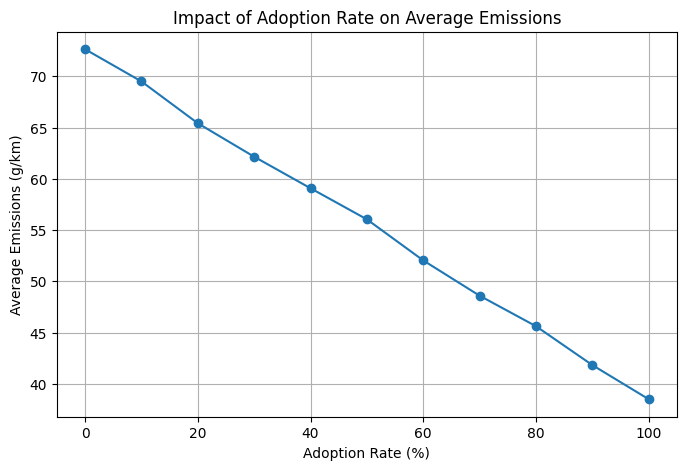

In [65]:
CLEAN_EMISSION = 38.5   # g/km for adopters
RATE_STEPS = np.linspace(0, 1, 11)  
em_col = "g_per_km"
df = population_ex.copy()
N = len(df)
# ---------- Simulation function ----------
def simulate_avg_emissions(target_rate, mode="override"):
    """
    target_rate: float 0..1 desired proportion of adopters
    mode:
      - "override": choose exactly floor(target_rate * N) random rows and set them as adopters (ignores existing)
      - "augment": keep existing adopters, then sample additional non-adopters until desired rate is reached
    Returns: average emissions (g/km) after applying adoption (adopters -> CLEAN_EMISSION)
    """
    df_sim = df.copy()

    # Number of adopters target
    k_target = int(round(target_rate * N))

    if mode == "override":
        # choose exactly k_target rows at random to be adopters
        if k_target == 0:
            adopters_idx = np.array([], dtype=int)
        else:
            adopters_idx = df_sim.sample(n=k_target, replace=False, random_state=np.random.randint(1_000_000)).index
        df_sim["adoption_sim"] = "no"
        df_sim.loc[adopters_idx, "adoption_sim"] = "yes"

    elif mode == "augment":
        # start from current adopters, then add more randomly
        current_adopters = df_sim.index[df_sim["adoption"] == "yes"].tolist()
        df_sim["adoption_sim"] = df_sim["adoption"].copy()
        current_k = len(current_adopters)
        if current_k >= k_target:
            # already at or above target, keep current adopters and mark extra as 'no' (no forced removal)
            pass
        else:
            needed = k_target - current_k
            candidate_idx = df_sim.index[df_sim["adoption_sim"] == "no"].to_list()
            if needed > 0 and len(candidate_idx) > 0:
                extra = pd.Series(candidate_idx).sample(n=min(needed, len(candidate_idx)),
                                                        random_state=np.random.randint(1_000_000)).tolist()
                df_sim.loc[extra, "adoption_sim"] = "yes"
    else:
        raise ValueError("mode must be 'override' or 'augment'")

    # Apply emissions: adopters -> CLEAN_EMISSION else original
    df_sim["emissions_sim"] = df_sim[em_col].where(df_sim["adoption_sim"] != "yes", other=CLEAN_EMISSION)

    return df_sim["emissions_sim"].mean(), df_sim

# ---------- Run simulation across rates ----------
mode = "override"   # set "override" or "augment" as you prefer
avg_emissions = []
for r in RATE_STEPS:
    avg, _ = simulate_avg_emissions(r, mode=mode)
    avg_emissions.append(avg)

# ---------- Plot ----------
plt.figure(figsize=(8,5))
plt.plot(RATE_STEPS * 100, avg_emissions, marker="o")
plt.xlabel("Adoption Rate (%)")
plt.ylabel("Average Emissions (g/km)")
plt.title(f"Impact of Adoption Rate on Average Emissions")
plt.grid(True)
plt.show()


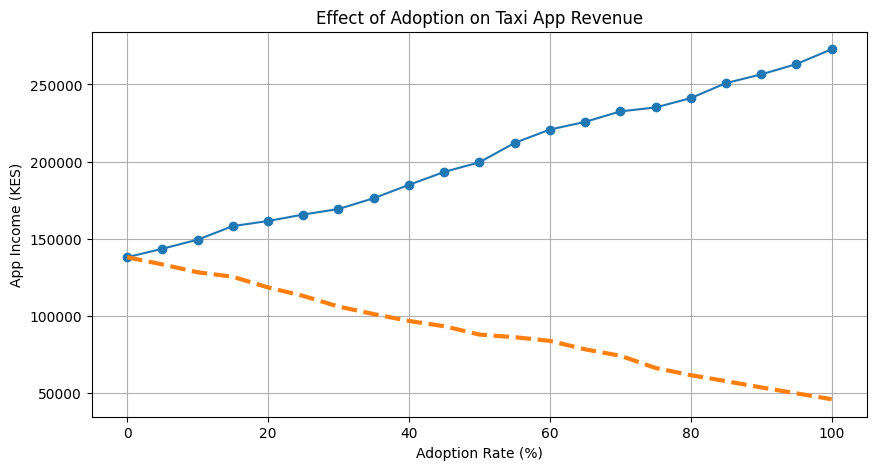

In [66]:
# Distance → kilometers (your exact mapping)
distance_map = {
    "<=20": 10,
    "21-40": 30,
    "41-60": 50,
    "61-80": 70,
    "80+": 100
}

# Taxi fare structure (your formula)
def compute_taxi_fare(distance_km):
    base = 270
    inc = 55
    if distance_km > 10:
        return base + inc * distance_km
    else:
        return distance_km * 30   # cost_per_km default

# Add numeric distance
df["km"] = df["travel_distance"].map(distance_map)

# Precompute taxi price for every user
df["taxi_fare_full"] = df["km"].apply(compute_taxi_fare)

APP_COMMISSION = 0.18

def simulate_income(adoption_rate):
    sim = df.copy()

    # Pick adopters
    adopters = sim.sample(frac=adoption_rate, replace=False,random_state=42).index
    sim["adopt"] = "no"
    sim.loc[adopters, "adopt"] = "yes"

    # If adopt → force Taxi mode
    sim["mode_sim"] = sim["mode_transportation"]
    sim.loc[sim["adopt"] == "yes", "mode_sim"] = "Taxi"

    # Final fare:
    # - adopters (Taxi) → fare / 3
    # - non-adopters Taxi → full fare
    # - non-Taxi → do not contribute revenue
    sim["fare_sim"] = 0

    # adopters using taxi
    mask = (sim["mode_sim"] == "Taxi") & (sim["adopt"] == "yes")
    sim.loc[mask, "fare_sim"] = sim.loc[mask, "taxi_fare_full"] / 3

    # non-adopters still using taxi
    mask2 = (sim["mode_sim"] == "Taxi") & (sim["adopt"] == "no")
    sim.loc[mask2, "fare_sim"] = sim.loc[mask2, "taxi_fare_full"]

    # App income = 18%
    income = sim["fare_sim"].sum() * APP_COMMISSION
       # NEW: total taxi spending only (for break-even curve)
    original_taxi_mask = df["mode_transportation"] == "Taxi"
    taxi_user_spend = sim.loc[original_taxi_mask, "fare_sim"].sum()*APP_COMMISSION

    return income,taxi_user_spend

# Generate curve
rates = np.linspace(0, 1, 21)
app_revenues = []
taxi_spend = []

for r in rates:
    income, taxi_only = simulate_income(r)
    app_revenues.append(income)
    taxi_spend.append(taxi_only)

plt.figure(figsize=(10,5))

plt.plot(rates * 100, app_revenues, label="App Revenue (KES)",marker="o")
plt.plot(rates * 100, taxi_spend, linewidth=3, linestyle="--", label="Total Taxi User Spend (KES)")
plt.xlabel("Adoption Rate (%)")
plt.ylabel("App Income (KES)")
plt.title("Effect of Adoption on Taxi App Revenue")
plt.grid(True)
plt.show()

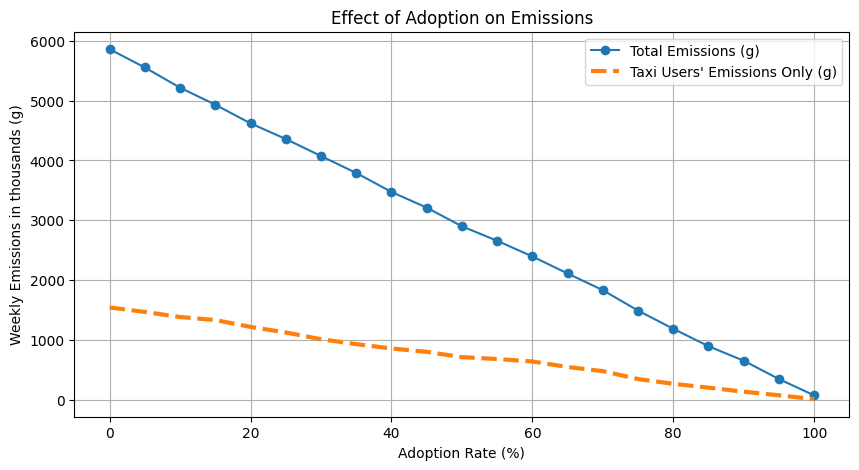

In [69]:
APP_COMMISSION=0.18
def simulate_emissions(adoption_rate):
    sim = df.copy()

    # Pick adopters
    adopters = sim.sample(frac=adoption_rate, replace=False,random_state=42).index
    sim["adopt"] = "no"
    sim.loc[adopters, "adopt"] = "yes"

    # If adopt → force Taxi mode
    sim["mode_sim"] = sim["mode_transportation"]
    sim.loc[sim["adopt"] == "yes", "mode_sim"] = "Taxi"

    # -------------------------
    #     EMISSIONS LOGIC
    # -------------------------
    original_taxi_mask=df["mode_transportation"]=="Taxi"
    # Non-adopters → existing distance × g_per_km
    sim["emissions"] = sim["km"] * sim["g_per_km"]

    # Adopters → emissions become fixed = 38.5
    sim.loc[sim["adopt"] == "yes", "emissions"] = 38.5

    # Total emissions for all users
    total_emissions = sim["emissions"].sum()

    # Emissions only from original taxi users
    taxi_emissions = sim.loc[original_taxi_mask, "emissions"].sum()

    return total_emissions, taxi_emissions
rates = np.linspace(0, 1, 21)

app_revenues = []
taxi_spend = []
emissions_total = []
emissions_taxi_only = []

for r in rates:
    emis_total, emis_taxi = simulate_emissions(r)
    app_revenues.append(income)
    taxi_spend.append(taxi_only)
    emissions_total.append(emis_total)
    emissions_taxi_only.append(emis_taxi)
plt.figure(figsize=(10,5))

plt.plot(rates * 100, [x/1000 for x in emissions_total],marker="o", label="Total Emissions (g)")
plt.plot(rates * 100, [x/1000 for x in emissions_taxi_only], linestyle="--", linewidth=3, label="Taxi Users' Emissions Only (g)")

plt.xlabel("Adoption Rate (%)")
plt.ylabel("Weekly Emissions in thousands (g)")
plt.title("Effect of Adoption on Emissions")
plt.grid(True)
plt.legend()
plt.show()


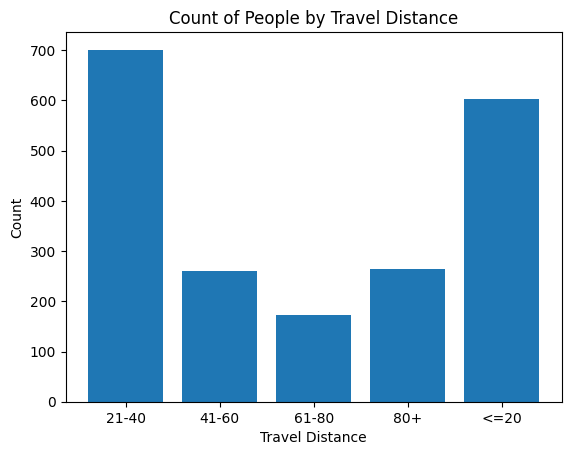

In [68]:
#showing variance in my dataset for each transport
counts = df['travel_distance'].value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xlabel("Travel Distance")
plt.ylabel("Count")
plt.title("Count of People by Travel Distance")
plt.show()